In [37]:
import pandas as pd
import numpy as np
import os,sys
import PIL
import matplotlib.pyplot as plt
from PIL import ImageOps

from tqdm.auto import tqdm
tqdm.pandas()


In [20]:
print("hello")

hello


In [21]:
#! ls ~/Downloads/train_parts/train

In [22]:
train_path = "retinopathy-cnn/old_train/"


In [23]:
df_train = pd.read_csv(train_path+"trainLabels.csv")

In [24]:
df_train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [25]:
df_train.shape

(35126, 2)

In [26]:
n_rows = df_train.shape[0]
n_rows

35126

In [27]:
df_train["filename"] = df_train["image"]+".jpeg"
df_train["path"] = [train_path]*n_rows
df_train.head()

,image,level,filename,path
0,10_left,0,10_left.jpeg,retinopathy-cnn/old_train/
1,10_right,0,10_right.jpeg,retinopathy-cnn/old_train/
2,13_left,0,13_left.jpeg,retinopathy-cnn/old_train/
3,13_right,0,13_right.jpeg,retinopathy-cnn/old_train/
4,15_left,1,15_left.jpeg,retinopathy-cnn/old_train/


In [28]:
%%time
img_sizes = []
widths = []
heights = []
aspect_ratios = []

for filename in tqdm(df_train["filename"]):
    img_path = os.path.join(train_path, filename)
    with open(img_path, 'rb') as f:
        img = PIL.Image.open(f)
        img_size = img.size
        img_sizes.append(img_size)
        widths.append(img_size[0])
        heights.append(img_size[1])
        aspect_ratios.append(img_size[0]/img_size[1])

df_train["width"] = widths
df_train["height"] = heights
df_train["aspect_ratio"] = aspect_ratios
df_train["size"] = img_sizes


CPU times: user 4.19 s, sys: 1.18 s, total: 5.36 s
Wall time: 6.22 s


In [29]:
df_train.head()

,image,level,filename,path,width,height,aspect_ratio
0,10_left,0,10_left.jpeg,retinopathy-cnn/old_train/,4752,3168,1.500000
1,10_right,0,10_right.jpeg,retinopathy-cnn/old_train/,4752,3168,1.500000
2,13_left,0,13_left.jpeg,retinopathy-cnn/old_train/,2592,1944,1.333333
3,13_right,0,13_right.jpeg,retinopathy-cnn/old_train/,2592,1944,1.333333
4,15_left,1,15_left.jpeg,retinopathy-cnn/old_train/,4928,3264,1.509804


In [31]:
df_sorted = df_train.sort_values(by="aspect_ratio")
df_sorted.head()

,image,level,filename,path,width,height,aspect_ratio
17732,22321_left,0,22321_left.jpeg,retinopathy-cnn/old_train/,1444,1444,1.0
11972,15018_left,0,15018_left.jpeg,retinopathy-cnn/old_train/,1444,1444,1.0
11973,15018_right,0,15018_right.jpeg,retinopathy-cnn/old_train/,1444,1444,1.0
34719,43867_right,0,43867_right.jpeg,retinopathy-cnn/old_train/,1444,1444,1.0
33434,42208_left,0,42208_left.jpeg,retinopathy-cnn/old_train/,1444,1444,1.0


In [32]:
df_sorted.tail()

,image,level,filename,path,width,height,aspect_ratio
29854,37758_left,0,37758_left.jpeg,retinopathy-cnn/old_train/,1792,1184,1.513514
29855,37758_right,0,37758_right.jpeg,retinopathy-cnn/old_train/,1792,1184,1.513514
24455,30910_right,0,30910_right.jpeg,retinopathy-cnn/old_train/,1792,1184,1.513514
22282,28092_left,0,28092_left.jpeg,retinopathy-cnn/old_train/,1792,1184,1.513514
6663,8387_right,2,8387_right.jpeg,retinopathy-cnn/old_train/,1792,1184,1.513514


In [34]:
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [35]:
def show_img(filename, path):
        img = PIL.Image.open(f"{path}/{filename}")
        npa = np.array(img)
        print(npa.shape)
        #https://stackoverflow.com/questions/35902302/discarding-alpha-channel-from-images-stored-as-numpy-arrays
#        npa3 = npa[ :, :, :3]
        print(filename)
        plt.imshow(npa)

(1444, 1444, 3)
22321_left.jpeg


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


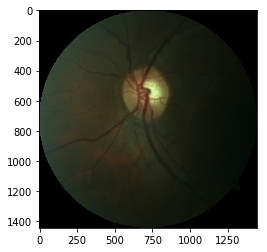

In [38]:
show_img(df_sorted.iloc[0].filename, train_path)

In [39]:
min(df_train["width"])

400

In [40]:
min(df_train["height"])


289

In [41]:
df_train.describe()


,level,width,height,aspect_ratio
count,35126.000000,35126.000000,35126.000000,35126.000000
mean,0.526049,3636.655241,2473.033166,1.462013
std,0.970390,801.830170,471.474465,0.073754
min,0.000000,400.000000,289.000000,1.000000
25%,0.000000,2816.000000,1944.000000,1.500000
50%,0.000000,3888.000000,2592.000000,1.500000
75%,1.000000,3888.000000,2592.000000,1.500000
max,4.000000,5184.000000,3456.000000,1.513514


In [88]:
def img_resize(filename, input_path, output_path):
	if not os.path.exists(output_path):
		os.makedirs(output_path)
	img = PIL.Image.open(f'{input_path}/{filename}')
	w = img.size[0]
	h = img.size[1]
	max_w = 512*3
	max_h = 512*3
	multiplier = 1
	if w > max_w or h > max_h:
		multiplier = max_w / w
		if h > w:
			multiplier = max_h / h
			#print("h multiplier:"+str(multiplier))
		else:
			#print("w multiplier:"+str(multiplier))
			pass
		w *= multiplier
		h *= multiplier
		w = int(w)
		h = int(h)
		
	print("multiplier:"+str(multiplier))
	resized = img.resize((w, h))
	resized.save(f'{output_path}/{filename}')
	img.close()
	del img


In [89]:


#r_img = img_resize(df_sorted.iloc[-1].filename, df_sorted.iloc[0].path, "retinopathy-cnn/rescaled")



In [90]:
#df_sorted.tail()

In [92]:
count = 0
total_rows = df_train.shape[0]
with tqdm(total=total_rows) as pbar:
	for index, row in df_train.iterrows():
		filename = row["filename"]
		input_path = row["path"]
		img_resize(filename, input_path, "retinopathy-cnn/rescaled")
		count += 1
		pbar.update(1)
		print(f"{count}/{total_rows}: ", end="")
print(f"processed {count} files")

#050 9197

multiplier:0.32323232323232326
1/35126: multiplier:0.32323232323232326
2/35126: multiplier:0.5925925925925926
3/35126: multiplier:0.5925925925925926
4/35126: multiplier:0.3116883116883117
5/35126: multiplier:0.3116883116883117
6/35126: multiplier:0.3950617283950617
7/35126: multiplier:0.3950617283950617
8/35126: multiplier:0.3950617283950617
9/35126: multiplier:0.3950617283950617
10/35126: multiplier:0.3950617283950617
11/35126: multiplier:0.3950617283950617
12/35126: multiplier:0.3950617283950617
13/35126: multiplier:0.3950617283950617
14/35126: multiplier:0.32323232323232326
15/35126: multiplier:0.32323232323232326
16/35126: multiplier:0.6
17/35126: multiplier:0.6
18/35126: multiplier:0.3950617283950617
19/35126: multiplier:0.3950617283950617
20/35126: multiplier:0.3950617283950617
21/35126: multiplier:0.3950617283950617
22/35126: multiplier:0.6
23/35126: multiplier:0.6
24/35126: multiplier:0.3116883116883117
25/35126: multiplier:0.3116883116883117
26/35126: multiplier:0.311688311688

KeyboardInterrupt: 